# **Importing Important Libraries**

In [1]:
from google.colab import drive                                        # For import dataset
import pandas as pd                                                   # For loading dataset
import matplotlib.pyplot as plt                                       # For data vizualization
import seaborn as sns                                                 # For displaying confusion matrix
import string                                                         # For removing punctuations
import re                                                             # For text preprocessing using regex
from spacy.lang.en import English, stop_words                         # For text preprocessing and removing stopwords
from sklearn.feature_extraction.text import TfidfVectorizer           # for information retrieval
from sklearn.model_selection import train_test_split                  # For splitting dataset
from sklearn.naive_bayes import MultinomialNB                         # For Naive Bayes Classifier
from sklearn.linear_model import LogisticRegression                   # For Logistic Regression
from sklearn.svm import SVC                                           # For Support Vector Machines
from sklearn.neighbors import KNeighborsClassifier                    # For K-Nearest Neighbours Classifier
from sklearn.ensemble import RandomForestClassifier                   # For Random Forest Classifier
from sklearn.tree import DecisionTreeClassifier                       # For Decision Tree Classifier
from sklearn.metrics import accuracy_score                            # For confusion matrix and classification report

# **Load Training Dataset**

In [2]:
# Load training data from drive
drive.mount('/content/drive')
train = pd.read_csv('drive/My Drive/train_data.txt', sep=':::', names=["ID", "TITLE", "GENRE", "DESCRIPTION"], engine='python')
train.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


# **Data Analysis**

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   TITLE        54214 non-null  object
 2   GENRE        54214 non-null  object
 3   DESCRIPTION  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


As we can see, there are no null values.

In [4]:
# Genres present
train["GENRE"].unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

<Axes: >

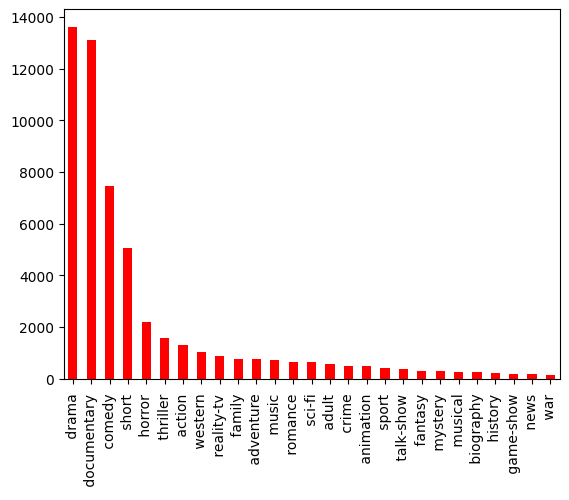

In [5]:
# Distribution of genres
train["GENRE"].value_counts().plot(kind="bar", color="r")

Most of the films are *drama* and *documentary*. *comedy* and *short* films being second most

# **Text Preprocessing**

In [6]:
# Checking if any twitter tags present
train[train["DESCRIPTION"].str.contains("@\S+")]

,ID,TITLE,GENRE,DESCRIPTION
242,243,Túlvilági beszélö (1992),documentary,Mail <svaradi@sprynet.com> for translation. T...
1880,1881,Rokonok (1954),drama,Mail <svaradi@sprynet.com> for translation. F...
1986,1987,Lila akác (1934),comedy,Mail <svaradi@sprynet.com> for translation. S...
6579,6580,A csúnya lány (1935),comedy,Mail <svaradi@sprynet.com> for translation. D...
8296,8297,Füszer és csemege (1940),drama,Mail <svaradi@sprynet.com> for translation. 5...
11999,12000,Squat (2017),comedy,Bob and Susan Landers Leave behind their hect...
13286,13287,A törökfejes kopja (1974),adventure,Mail <svaradi@sprynet.com> for translation. 1...
13702,13703,Kurtalábú pásztor (1970),adventure,Mail <svaradi@sprynet.com> for translation. P...
14376,14377,The Delivery Man (2007/I),short,"""You let standards fall like that, the next t..."
15669,15670,Psalmus humanus (1985),documentary,Mail <svaradi@sprynet.com> for translation. S...


We instead have email addresses for translations.

In [7]:
# Checking if any URLs present
train[train["DESCRIPTION"].str.contains("https?\S+")]

,ID,TITLE,GENRE,DESCRIPTION
16974,16975,The Happiness Matrix (2012),documentary,"Volume 1 of ""The Happiness Matrix"", a 2-hour ..."
20748,20749,Blocking the Path to 9/11 (2008),documentary,There's more to the story of the Clintons and...
26257,26258,"""Offbeat America"" (2005)",reality-tv,High Noon Entertainment hosts visit the Asian...
30651,30652,Hollywood Love (1998),comedy,A feminist sex movie??? http:hollywoodlovemov...
33419,33420,Trust 22 (2007),documentary,In this amazing film full of magic the direct...
34416,34417,Voices in Exile (2005),documentary,"Most film and photography on Tibet is from ""T..."
37725,37726,A Strange Love Affair with Ego (2015),documentary,"Ever since she was a young child, filmmaker E..."
46413,46414,Evil Tales 3: The Final Chapter (2003),horror,4 short films of horror are related by scanti...
49015,49016,"""The L.A. Hardcore"" (2005)",documentary,The L.A. Hardcore is a television series taki...


In [8]:
nlp = English()

# Function to preprocess
def cleaned(text):

  text = re.sub("Mail <svaradi@sprynet.com> for translation. ","",text)  # Remove email addresses
  text = re.sub("https?\S+","",text)  # Remove URLs
  text = re.sub("\d+","",text)  # Remove numbers

  # Convert to lowercase
  cleaned = text.lower()

  # Remove punctuations
  cleaned = "".join(char for char in cleaned if char not in string.punctuation)

  # Tokenization
  my_doc = nlp(cleaned)
  token_list = []
  for token in my_doc:
    token_list.append(token.text)

  # Remove stop-words
  filtered_sentence = []
  for word in token_list:
    lexeme = nlp.vocab[word]
    if lexeme.is_stop == False:
      filtered_sentence.append(word)

  # Preprocessed message
  cleaned = " ".join(filtered_sentence)

  return cleaned



In [9]:
# Text preprocessing
train["cleaned"] = train["DESCRIPTION"].apply(cleaned)

In [10]:
train.head()

,ID,TITLE,GENRE,DESCRIPTION,cleaned
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents yearol...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship ...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natur...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father ends meet edith twin ...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films title refers unrecovered bodies ground...


# **Dataset Preparation**

In [11]:
# Information retieval using TF-IDF
tfidf = TfidfVectorizer()

features = tfidf.fit_transform(train["cleaned"])
target = train["GENRE"]

In [12]:
# Splitting dataset into training and validation
X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size=0.3, random_state=13)

# **Train Classifiers**

In [13]:
# Function to display confusion matrix and classification report
def accuracy(model):

  # Training and testing predictions
  pred_train = model.predict(X_train)
  pred_val = model.predict(X_val)

  print("Train accuracy : ", accuracy_score(Y_train, pred_train))
  print("Test accuracy  : ", accuracy_score(Y_val, pred_val))

## **Naive Bayes**

In [14]:
model_nb = MultinomialNB()
model_nb.fit(X_train,Y_train)
accuracy(model_nb)

Train accuracy :  0.46889246093441195
Test accuracy  :  0.44531201967414696


## **Logistic Regression**

In [15]:
model_lr = LogisticRegression(solver="liblinear")
model_lr.fit(X_train,Y_train)
accuracy(model_lr)

Train accuracy :  0.6826003320245593
Test accuracy  :  0.5669843221641562


## **Random Forest Classifier**

In [16]:
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train,Y_train)
accuracy(model_rfc)

Train accuracy :  0.9995783815120293
Test accuracy  :  0.4823854903166308


## **Decision Tree Classifier**

In [17]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,Y_train)
accuracy(model_dt)

Train accuracy :  0.9995783815120293
Test accuracy  :  0.3695665539501998


- Naive Bayes gives less accuracy
- Decision Tree and Random Forest give overtfit model
- Logistic regression is the best model

# **Evaluating performance model on test dataset**

In [18]:
# Load testing data from drive
drive.mount('/content/drive')
test = pd.read_csv('drive/My Drive/test_data.txt', sep=':::', names=["ID", "TITLE", "DESCRIPTION"], engine='python')
test.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [19]:
test["cleaned"] = test["DESCRIPTION"].apply(cleaned)

In [20]:
test.head()

,ID,TITLE,DESCRIPTION,cleaned
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",lr brane loves life car apartment job espe...
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child belonging ...
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,year life albin family shepherds north trans...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died nt spoken brother years cancer...
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial arts superstar...


In [21]:
tst_feat = tfidf.transform(test["cleaned"])

In [22]:
test["PREDICTION"] = model_lr.predict(tst_feat)
test.head()

,ID,TITLE,DESCRIPTION,cleaned,PREDICTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",lr brane loves life car apartment job espe...,drama
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child belonging ...,drama
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,year life albin family shepherds north trans...,documentary
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died nt spoken brother years cancer...,drama
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial arts superstar...,drama


In [23]:
# Load test data solution from drive
drive.mount('/content/drive')
test_sol = pd.read_csv('drive/My Drive/test_data_solution.txt', sep=':::', names=["ID", "TITLE", "GENRE", "DESCRIPTION"], engine='python')
test_sol.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [24]:
print("Accuracy Score : ", accuracy_score(test_sol["GENRE"], test["PREDICTION"]))

Accuracy Score :  0.5668081180811808


We have accuracy of 56.7%